<a href="https://colab.research.google.com/github/SimonBurmer/Jupyter-Notebook/blob/master/Sklearn_Iris_Dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data**

---



In [0]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#all the data is saved in an nparry
iris = load_iris()
features = iris['data']
target = iris['target']
target_names =  iris['target_names']
feature_names = iris['feature_names']

#**Show Dataset**


---



In [57]:

iris_target_list =target.tolist() 
#to store differten data types we have to convert the array into a list

for i in range(len(iris_target_list)):
    if iris_target_list[i] == 0:
        iris_target_list[i] = "Iris setosa"
    if iris_target_list[i] == 1:
        iris_target_list[i] = "Iris virginica"
    if iris_target_list[i] == 2:
        iris_target_list[i] = "Iris versicolor"

frame = pd.DataFrame(features, columns= feature_names)
frame.insert(4, "Iris", iris_target_list)
frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris
0,5.1,3.5,1.4,0.2,Iris setosa
1,4.9,3.0,1.4,0.2,Iris setosa
2,4.7,3.2,1.3,0.2,Iris setosa
3,4.6,3.1,1.5,0.2,Iris setosa
4,5.0,3.6,1.4,0.2,Iris setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris versicolor
146,6.3,2.5,5.0,1.9,Iris versicolor
147,6.5,3.0,5.2,2.0,Iris versicolor
148,6.2,3.4,5.4,2.3,Iris versicolor


# **Data Preperation**

---

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

# Scale features to have mean 0 and variance 1 
scaler = StandardScaler()
X = scaler.fit_transform(features)

print(features[:3,])
print("becoms:")
print(X[:3,])

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.5, random_state=1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
becoms:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]]


# **Data Visualization**

---

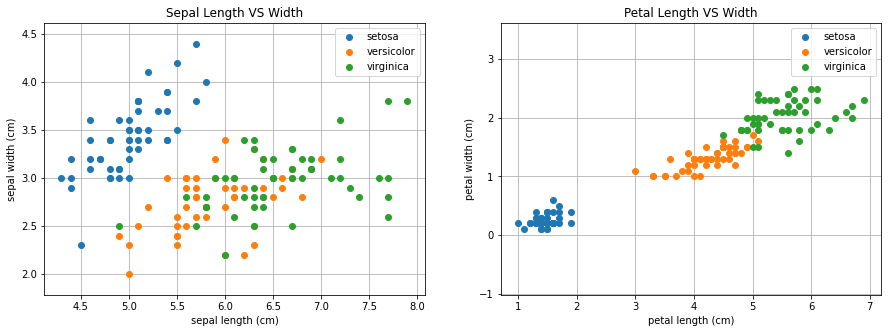

In [59]:
def plotScatter(target,x,y,title=""):
    for i, target_name in enumerate(target_names):
        X_plot = features[target == i]
        plt.plot(X_plot[:, x], X_plot[:, y], linestyle='none', marker='o', label=target_name)
    plt.xlabel(feature_names[x])
    plt.ylabel(feature_names[y])
    plt.title(title)
    plt.legend()
    plt.axis('equal')
    plt.grid("True")

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plotScatter(target,0,1,"Sepal Length VS Width")
plt.subplot(1,2,2)
plotScatter(target,2,3,"Petal Length VS Width")
plt.show()

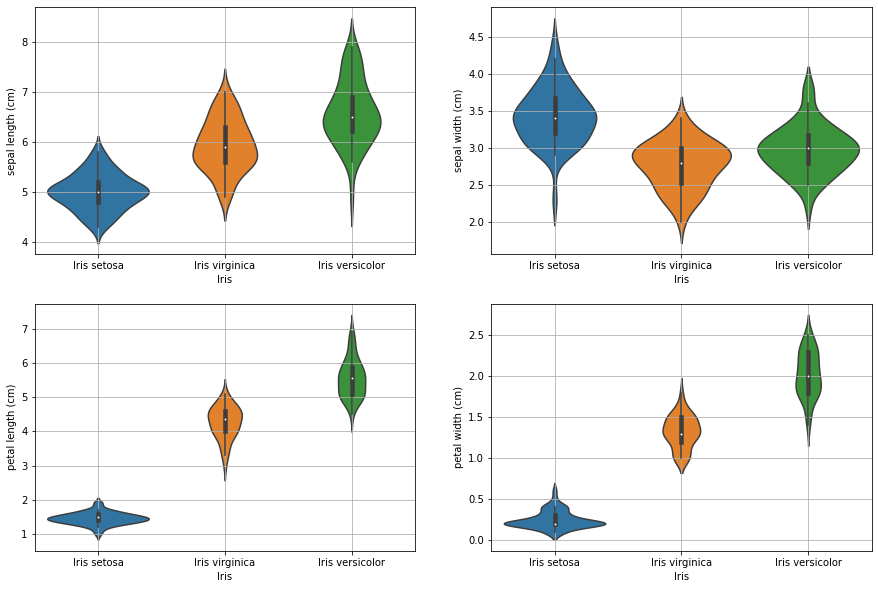

In [60]:
import seaborn as sns

plt.figure(figsize=(15,10))

for n in range(0,4):
  plt.subplot(2,2,n+1)
  sns.violinplot(x='Iris',y=frame.columns[n],data=frame)
  plt.grid("True")

plt.show()

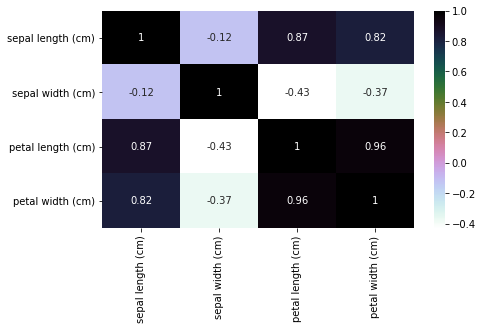

In [61]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.heatmap(frame.corr(),annot=True,cmap='cubehelix_r')
plt.show()

# **Logistic Regression**
---

------------------------------------------------------------------------------------------------
accuracy:  0.9600000000000002
------------------------------------------------------------------------------------------------


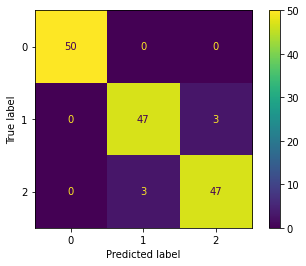

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics #for checking the model accuracy


model = LogisticRegression()
model.fit(X_train, Y_train)
prediction=model.predict(X_test)

scores = cross_val_score(model, X, target, cv=10)
print("--" *48)
print("accuracy: ", scores.mean())
print("--" *48)

metrics.plot_confusion_matrix(model, X,target)
plt.show()

# **Decision Tree**

---



------------------------------------------------------------------------------------------------
accuracy:  0.96
------------------------------------------------------------------------------------------------


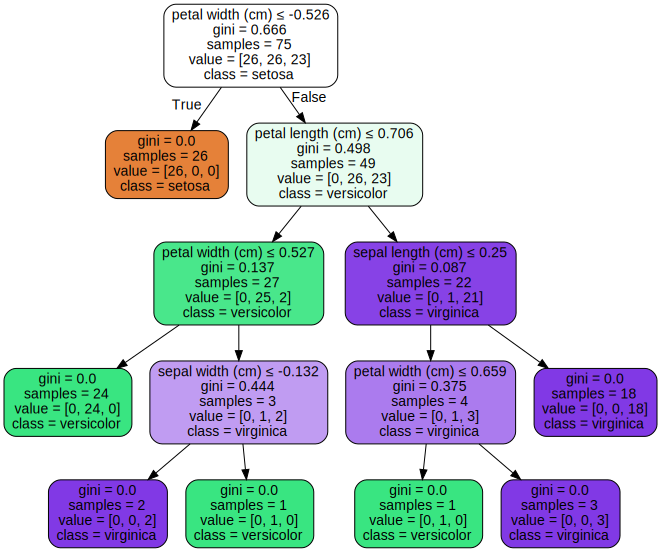

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz 

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)


scores = cross_val_score(model, X, target, cv=10)
print("--" *48)
print("accuracy: ", scores.mean())
print("--" *48)

dot_data = export_graphviz(model, feature_names= feature_names,  class_names= target_names,
                                filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

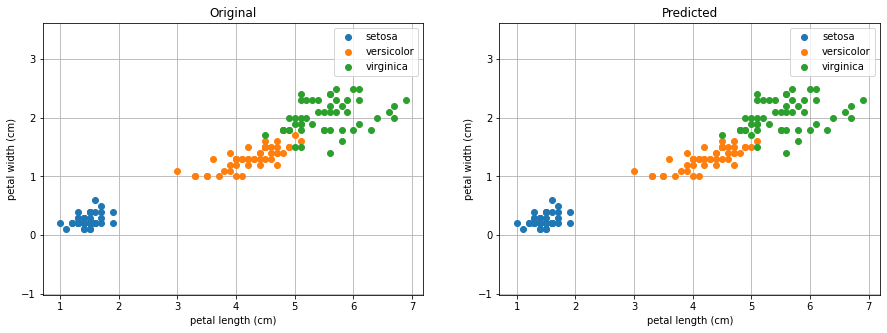

In [82]:

#PLOT PREDICITON AND ORIGINAL
prediction = model.predict(X)

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plotScatter(target,2,3,"Original")
plt.subplot(1,2,2)
plotScatter(prediction,2,3,"Predicted")
plt.show()

# **K-Nearest Neighbours**


---





In [79]:
from sklearn.neighbors import KNeighborsClassifier

best_acc = 0
for neighbors in range(3, 10):
    for weights in ['uniform', 'distance']:
        #model looks for the 3-10 closest datapoints
        model = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
        #train the model
        model.fit(X_train, Y_train)
        acc = model.score(X_test, Y_test)

        if acc > best_acc:
            best_acc = acc
            best_model = model

#show best model
model = best_model
print("--" *48)
print("best model params: \n" , model.get_params())
scores = cross_val_score(model, X, target, cv=10)
print("--" *48)
print("accuracy: ", scores.mean())
print("--" *48)

------------------------------------------------------------------------------------------------
best model params: 
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
------------------------------------------------------------------------------------------------
accuracy:  0.9666666666666668
------------------------------------------------------------------------------------------------


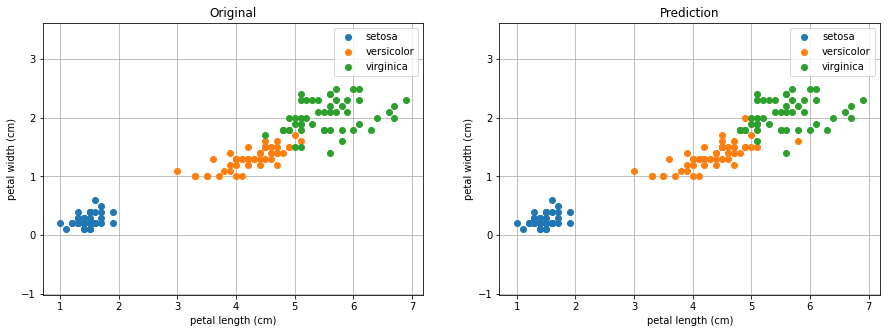

In [80]:

#PLOT PREDICITON AND ORIGINAL
prediction = model.predict(X)

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plotScatter(target,2,3,"Original")
plt.subplot(1,2,2)
plotScatter(prediction,2,3,"Prediction")
plt.show()

# **Support Vector Machine (SVM)**

---



In [77]:
from sklearn import svm

best_acc = 0
for kernel in ['linear', 'rbf', 'sigmoid','poly']:  # poly kernel isnt useful here
    for c in [0.1,0.5,1,3,100,500,800]:
        model = svm.SVC(kernel=kernel, C=c)

        model.fit(X_train, Y_train)
        acc = model.score(X_test, Y_test)
        if acc > best_acc:
            best_acc = acc
            best_model = model


model = best_model
print("--" *48)
print("best model params: \n" , model.get_params())
scores = cross_val_score(model, X, target, cv=10)
print("--" *48)
print("accuracy: ", scores.mean())
print("--" *48)

------------------------------------------------------------------------------------------------
best model params: 
 {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
------------------------------------------------------------------------------------------------
accuracy:  0.9666666666666668
------------------------------------------------------------------------------------------------


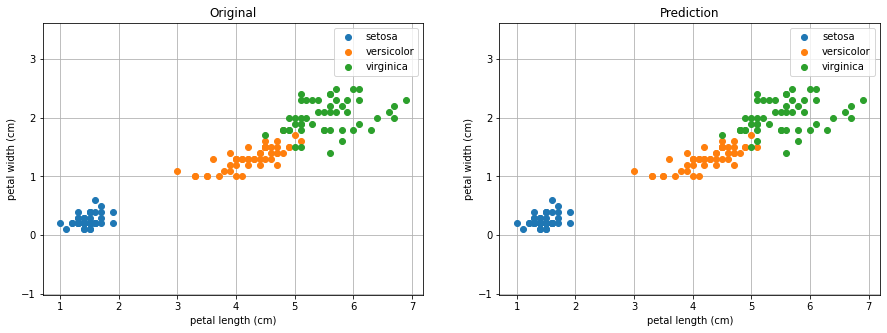

In [78]:
#PLOT PREDICITON AND ORIGINAL
prediction = model.predict(X)

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plotScatter(target,2,3,"Original")
plt.subplot(1,2,2)
plotScatter(prediction,2,3,"Prediction")
plt.show()

# **K-Means**

---



In [75]:
from sklearn.cluster import KMeans


def acc(model, X_test ):
    prediction = model.predict(X_test)
    correct = 0
    for i,Y in enumerate(Y_test):
      if prediction[i] == Y:
        correct = correct +1

    acc = correct / len(X_test)
    return acc

#n_init:Number of time the k-means algorithm will be run with different centroid seeds.
model = KMeans(n_clusters=3, init="k-means++", n_init=10)
model.fit(X_train)
print("--" *48)
print("accuracy: ",acc(model,X_test))
print("--" *48)

------------------------------------------------------------------------------------------------
accuracy:  0.29333333333333333
------------------------------------------------------------------------------------------------


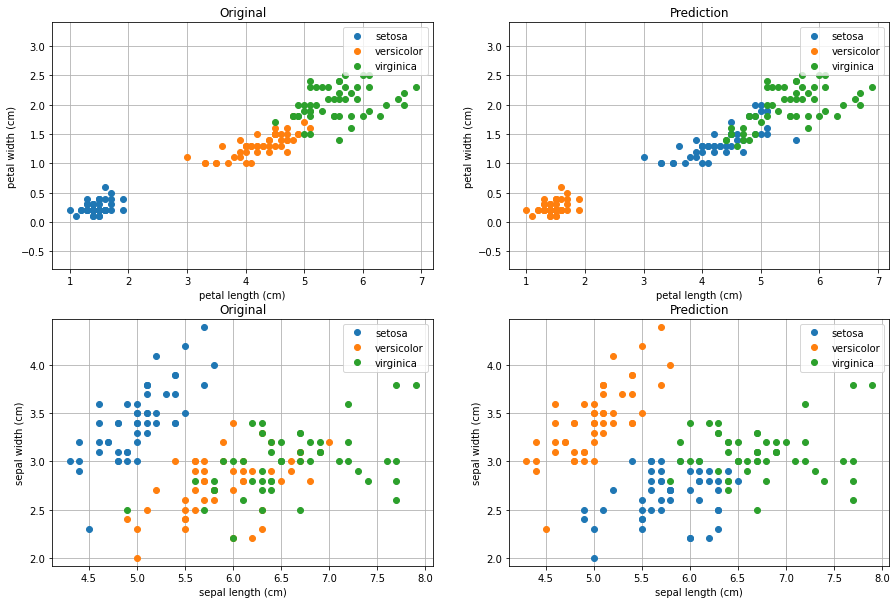

In [76]:
#PLOT PREDICITON AND ORIGINAL
prediction = model.predict(X)

plt.figure(figsize= (15,10))
plt.subplot(2,2,1)
plotScatter(target,2,3,"Original")
plt.subplot(2,2,2)
plotScatter(prediction,2,3,"Prediction")
plt.subplot(2,2,3)
plotScatter(target,0,1,"Original")
plt.subplot(2,2,4)
plotScatter(prediction,0,1,"Prediction")
plt.show()